In [1]:
%load_ext autoreload
%autoreload 2

import analysis
import plots
import runner
import numpy as np
from utils import generate_ou_input


# Exploration of variations of noise input 


In [2]:
params = dict()
params['runtime'] = 400
params['min_dt'] = 0.05
params['ou_stationary'] = True

def plot_ou_noise(params: dict):
    mean = generate_ou_input(params['runtime'], params['min_dt'], params['ou_stationary'], params['ou_mu'])
    sigma = generate_ou_input(params['runtime'], params['min_dt'], params['ou_stationary'], params['ou_sigma'])
    plots.noise(mean, sigma, save=False)

### Weak Correlation - Default Configuration

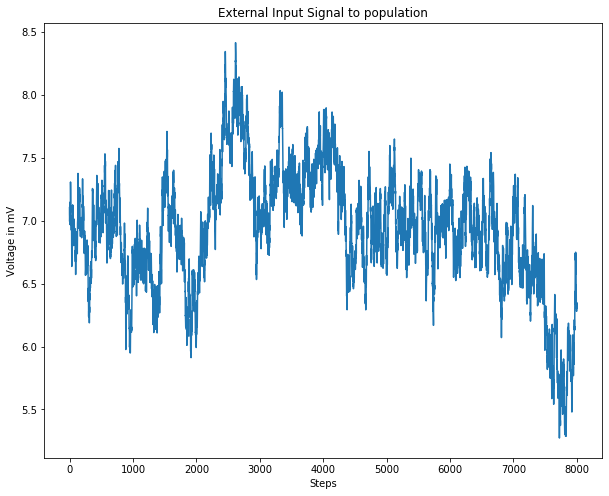

In [3]:
params['ou_mu'] = {
    'ou_X0': 0.,
    'ou_mean': 5.0,
    'ou_sigma': .5,
    'ou_tau': 50.
}

# noise params for sigma
params['ou_sigma'] = {
    'ou_X0': 0.,
    'ou_mean': 2.0,
    'ou_sigma': 0.2,
    'ou_tau': 1.
}

plot_ou_noise(params)

### Medium Correlation - Default Configuration

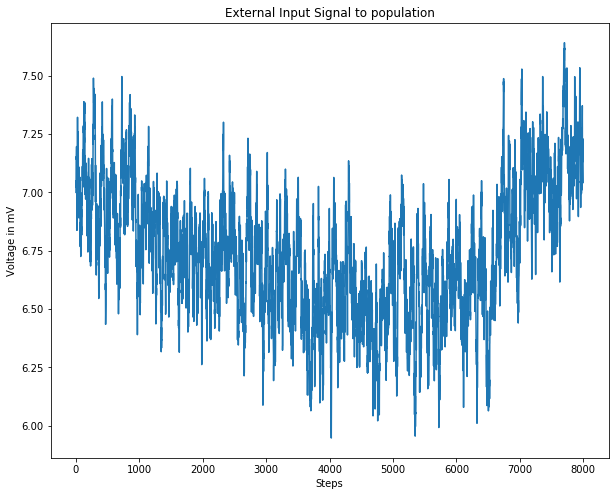

In [4]:
params['ou_mu'] = {
    'ou_X0': 0.,
    'ou_mean': 5.0,
    'ou_sigma': .5,
    'ou_tau': 500.
}

# noise params for sigma
params['ou_sigma'] = {
    'ou_X0': 0.,
    'ou_mean': 2.0,
    'ou_sigma': 0.2,
    'ou_tau': 1.
}

plot_ou_noise(params)

### Very Strong Correlation over Time

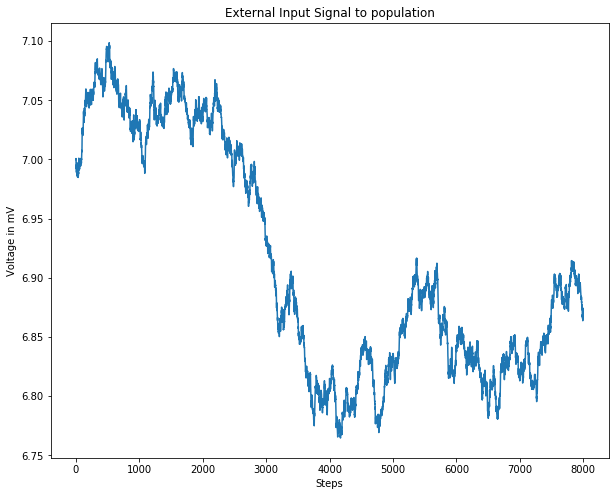

In [5]:
params['ou_mu'] = {
    'ou_X0': 0.,
    'ou_mean': 5.0,
    'ou_sigma': .5,
    'ou_tau': 5000.
}

params['ou_sigma'] = {
    'ou_X0': 0.,
    'ou_mean': 2.0,
    'ou_sigma': 0.2,
    'ou_tau': 10000.
}

plot_ou_noise(params)

In [6]:
results = runner.run("strong_correlation", modified_params=params)

building synapses...
build synapses time: 0.6563301086425781s
------------------ running network!
runtime: 37.4


INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


[Errno 17] File exists: 'plots/strong_correlation'
Generate PSD plot ...
Generate PSD plot ...


ValueError: x and y must have same first dimension, but have shapes (8000,) and (400,)

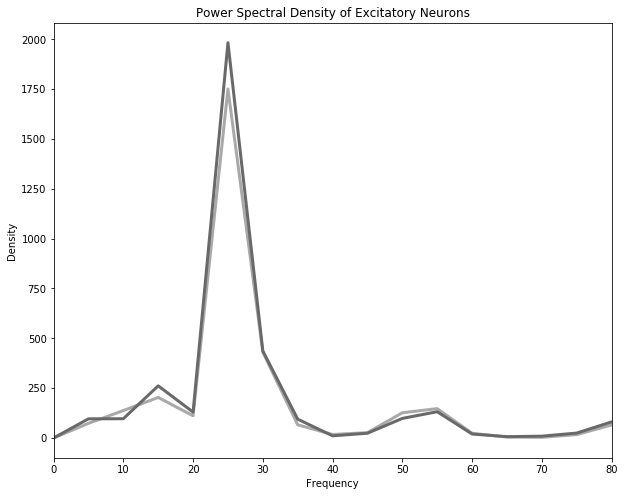

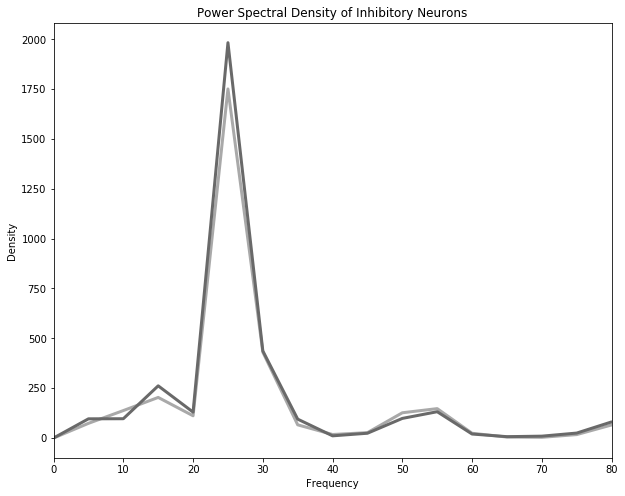

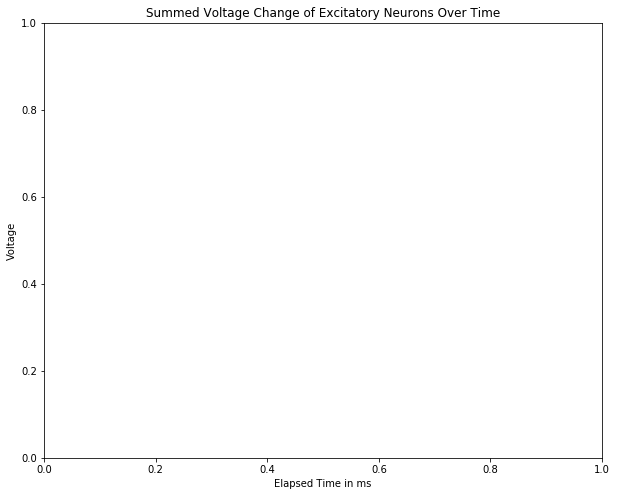

In [7]:
analysis.analyze_model(results, 'strong_correlation')

### Gaussian white noise (no correlation $\tau$ = 1)

In [ ]:
params['ou_mu'] = {
    'ou_X0': 0.,
    'ou_mean': 5.0,
    'ou_sigma': .5,
    'ou_tau': 1.
}

params['ou_sigma'] = {
    'ou_X0': 0.,
    'ou_mean': 2.0,
    'ou_sigma': 0.2,
    'ou_tau': 1.
}

plot_ou_noise(params)


In [ ]:
params['ou_mu'] = {
    'ou_X0': 0.,
    'ou_mean': 2.0,
    'ou_sigma': .5,
    'ou_tau': 1.
}

params['ou_sigma'] = {
    'ou_X0': 0.,
    'ou_mean': 0.0,
    'ou_sigma': 0.2,
    'ou_tau': 1.
}

In [ ]:
plot_ou_noise(params)

In [ ]:
results = runner.run("low_strength", modified_params=params)

In [ ]:
analysis.analyze_model(results, 'low_strength')

## Effect of Mean on the Frequency

Parameter range: $0.5$ steps starting from $0$ and stopping at $4.5$.

The mean or strength of the noise is positively correlated with the dominant frequency of the network.
I.e. we see for each $0.5$ increase in the mean a rise in the frequency band.

Explanation: this result is not surprising as an increase in the mean leads to higher membrane voltage in the single neurons.
This results in faster crossing of the membrane threshold and stronger drive in the network.

TODO: verify explanations 

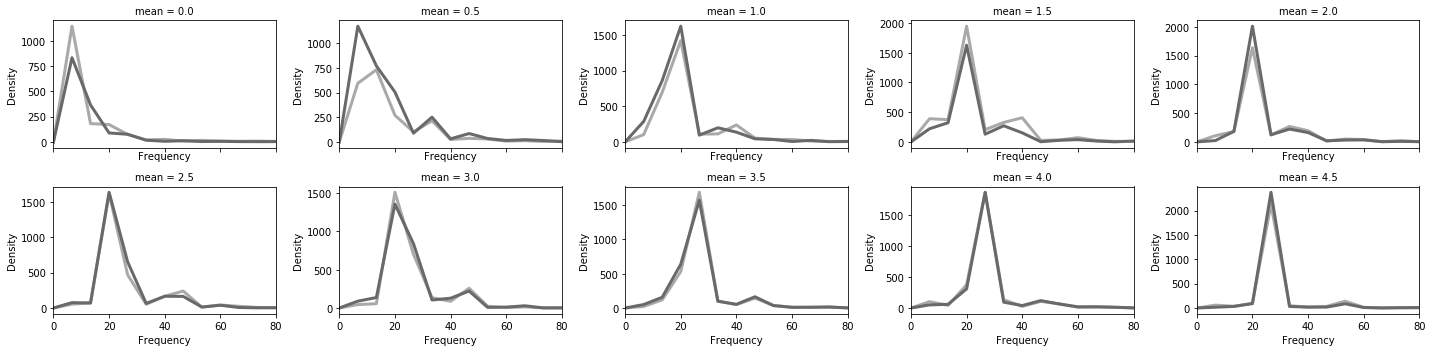

In [8]:
models = analysis.load([str(el) for el in np.arange(0, 5, 0.5)])
plots.all_psd(models=models, n_cols=2, n_rows=5)
